**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [6]:
train_df.head()

,id,text,emotion,intensity
2315,30311,Watch this amazing live.ly broadcast by @evanh...,joy,0.560
3503,40676,Do not be discouraged by a slowing sales marke...,sadness,0.271
3355,40528,@VosachResrus ^'ll just #wobble carry you #sink,sadness,0.396
103,10103,Wont use using @mothercareuk @Mothercarehelp a...,anger,0.708
32,10032,I blame the whole season on Natalie! The seaso...,anger,0.792


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


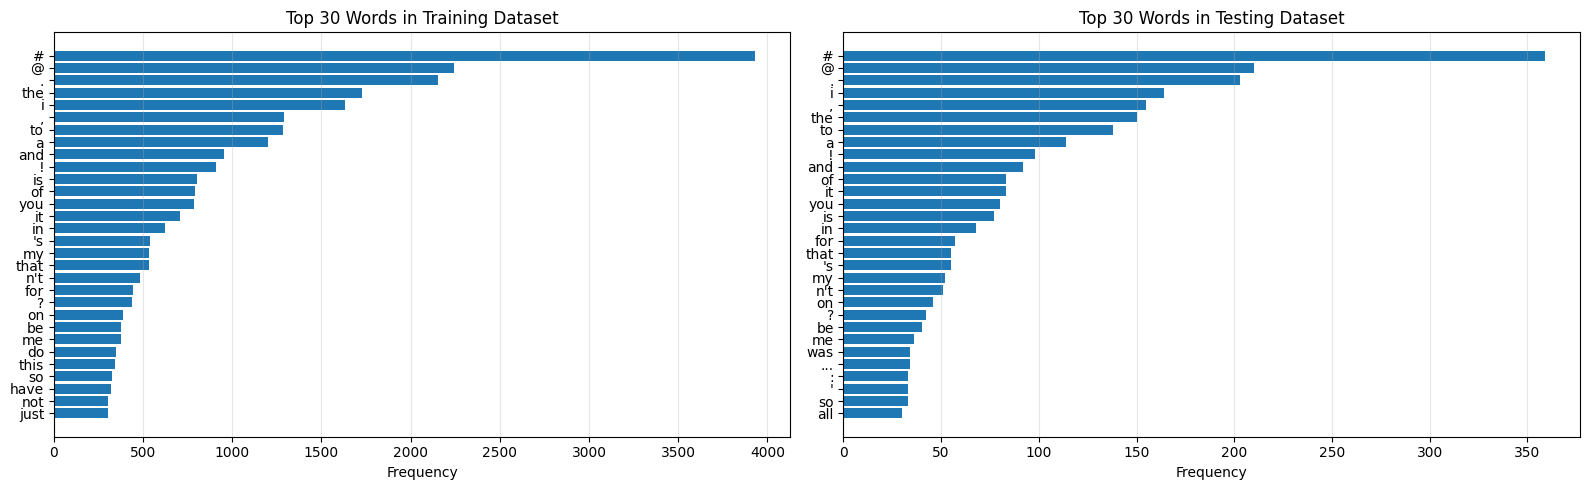

In [ ]:
# Answer here
# No deletet stopwords.
import matplotlib.pyplot as plt
from collections import Counter
import nltk

# Tokenize all text
train_words = []
for text in train_df['text']:
    train_words.extend(nltk.word_tokenize(text.lower()))

test_words = []
for text in test_df['text']:
    test_words.extend(nltk.word_tokenize(text.lower()))

# Count word frequency
train_word_freq = Counter(train_words)
test_word_freq = Counter(test_words)

# Get top 30 words
top30_train = train_word_freq.most_common(30)
top30_test = test_word_freq.most_common(30)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

words_train = [word for word, count in top30_train]
counts_train = [count for word, count in top30_train]
axes[0].barh(range(len(words_train)), counts_train)
axes[0].set_yticks(range(len(words_train)))
axes[0].set_yticklabels(words_train)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 30 Words in Training Dataset')
axes[0].grid(axis='x', alpha=0.3)

words_test = [word for word, count in top30_test]
counts_test = [count for word, count in top30_test]
axes[1].barh(range(len(words_test)), counts_test)
axes[1].set_yticks(range(len(words_test)))
axes[1].set_yticklabels(words_test)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 30 Words in Testing Dataset')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

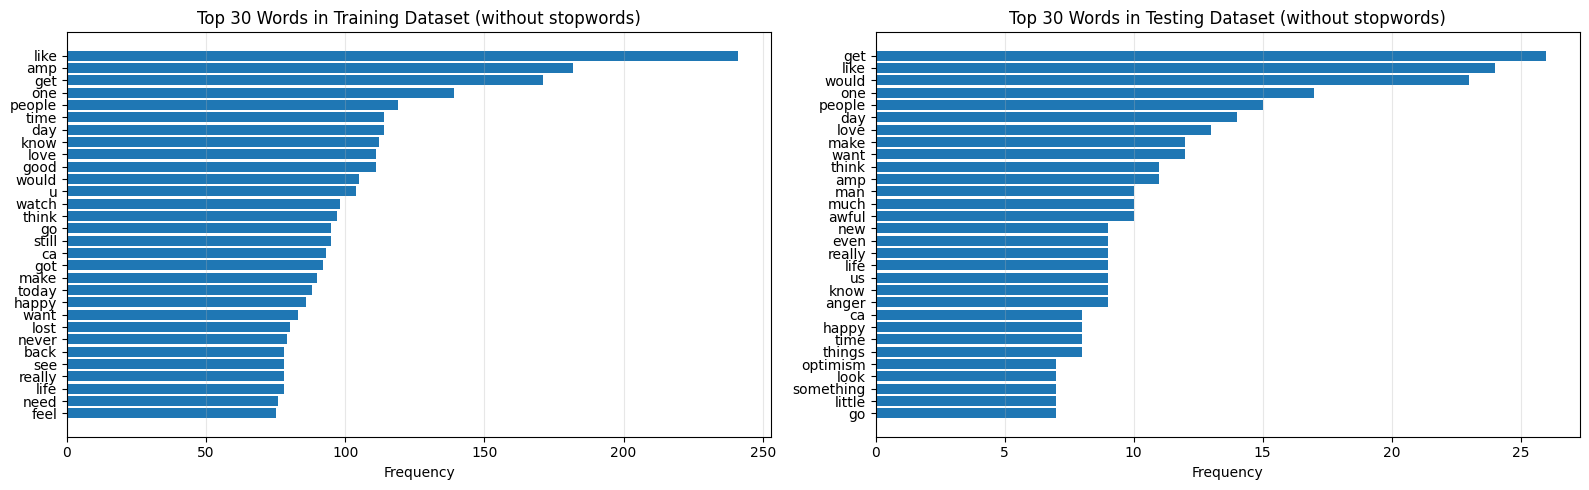

In [12]:
# delete stopwords
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stop_words = set(stopwords.words('english'))
except:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

# Tokenize all text and remove stopwords
train_words = []
for text in train_df['text']:
    tokens = nltk.word_tokenize(text.lower())
    # Filter out stopwords and non-alphabetic tokens
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    train_words.extend(filtered_tokens)

test_words = []
for text in test_df['text']:
    tokens = nltk.word_tokenize(text.lower())
    # Filter out stopwords and non-alphabetic tokens
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    test_words.extend(filtered_tokens)

train_word_freq = Counter(train_words)
test_word_freq = Counter(test_words)
top30_train = train_word_freq.most_common(30)
top30_test = test_word_freq.most_common(30)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

words_train = [word for word, count in top30_train]
counts_train = [count for word, count in top30_train]
axes[0].barh(range(len(words_train)), counts_train)
axes[0].set_yticks(range(len(words_train)))
axes[0].set_yticklabels(words_train)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 30 Words in Training Dataset (without stopwords)')
axes[0].grid(axis='x', alpha=0.3)

words_test = [word for word, count in top30_test]
counts_test = [count for word, count in top30_test]
axes[1].barh(range(len(words_test)), counts_test)
axes[1].set_yticks(range(len(words_test)))
axes[1].set_yticklabels(words_test)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 30 Words in Testing Dataset (without stopwords)')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [13]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [14]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [15]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

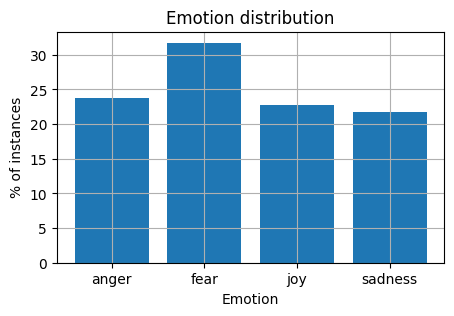

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [19]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [20]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [21]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [22]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [24]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [25]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [26]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

d:\ybcvx\Documents\NCKU\ISA5810\Lab2\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [27]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [29]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_1000.fit(train_df['text'])

# Transform both training and testing data
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])
test_data_TFIDF_features_1000 = TFIDF_1000.transform(test_df['text'])

print('Training data shape:', train_data_TFIDF_features_1000.shape)
print('Testing data shape:', test_data_TFIDF_features_1000.shape)
feature_names_tfidf_1000 = TFIDF_1000.get_feature_names_out()

# Show feature names for features [100:110]
print('\nFeature names [100:110]:')
print(feature_names_tfidf_1000[100:110])

Training data shape: (3613, 1000)
Testing data shape: (347, 1000)

Feature names [100:110]:
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [33]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'anger', 'sadness', 'anger', 'anger', 'joy',
       'anger', 'fear', 'sadness'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [39]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [35]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [36]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [37]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

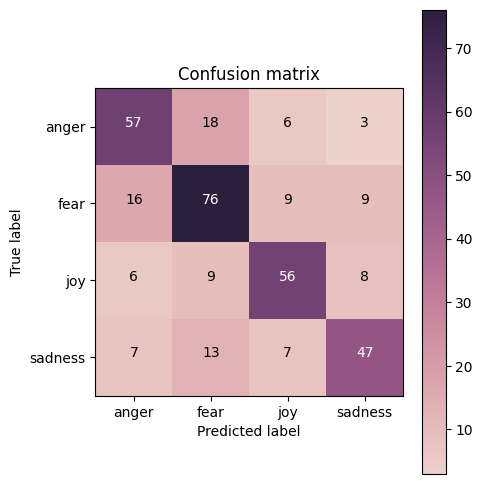

In [38]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [40]:
# Answer here
print("Maybe the model has overfitting issue because the training accuracy is 0.99 and testing accuracy is 0.52\n")
print("And the model is performing best on 'joy' emotion with f1-score of 0.71.\n")
print("Maybe we can say that the model is better at identifying positive emotions compared to negative ones like 'sadness', 'fear' and 'anger'.\n")

Maybe the model has overfitting issue because the training accuracy is 0.99 and testing accuracy is 0.52

And the model is performing best on 'joy' emotion with f1-score of 0.71.

Maybe we can say that the model is better at identifying positive emotions compared to negative ones like 'sadness', 'fear' and 'anger'.



---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

NAIVE BAYES MODEL RESULTS
Training accuracy: 0.79
Testing accuracy: 0.7

Classification Report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

Confusion Matrix:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]



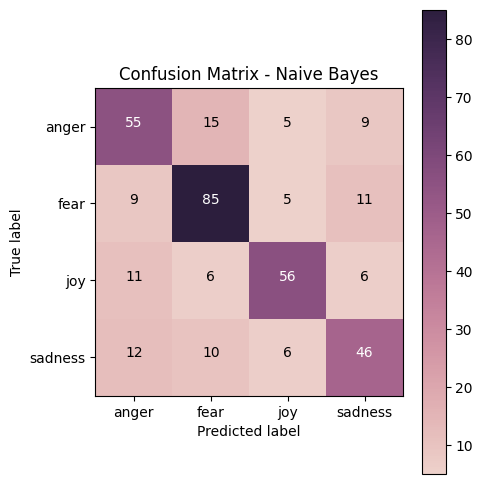

COMPARISON: DECISION TREE vs NAIVE BAYES
Decision Tree - Training Acc: 0.99 | Testing Acc: 0.68
Naive Bayes   - Training Acc: 0.79 | Testing Acc: 0.7

Overfitting Gap (Train - Test):
Decision Tree: 0.31
Naive Bayes:   0.09


In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data (使用與 Decision Tree 相同的特徵)
X_train_nb = BOW_500.transform(train_df['text'])
y_train_nb = train_df['emotion']

X_test_nb = BOW_500.transform(test_df['text'])
y_test_nb = test_df['emotion']


NB_model = MultinomialNB()
NB_model.fit(X_train_nb, y_train_nb)

y_train_pred_nb = NB_model.predict(X_train_nb)
y_test_pred_nb = NB_model.predict(X_test_nb)

acc_train_nb = accuracy_score(y_true=y_train_nb, y_pred=y_train_pred_nb)
acc_test_nb = accuracy_score(y_true=y_test_nb, y_pred=y_test_pred_nb)

print('=' * 50)
print('NAIVE BAYES MODEL RESULTS')
print('=' * 50)
print('Training accuracy: {}'.format(round(acc_train_nb, 2)))
print('Testing accuracy: {}'.format(round(acc_test_nb, 2)))
print()

# Classification Report
print('Classification Report:')
print(classification_report(y_true=y_test_nb, y_pred=y_test_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_true=y_test_nb, y_pred=y_test_pred_nb)
print('Confusion Matrix:')
print(cm_nb)
print()

# Plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb, classes=my_tags, title='Confusion Matrix - Naive Bayes')

# Compare with Decision Tree
print('=' * 50)
print('COMPARISON: DECISION TREE vs NAIVE BAYES')
print('=' * 50)
print(f'Decision Tree - Training Acc: {round(acc_train, 2)} | Testing Acc: {round(acc_test, 2)}')
print(f'Naive Bayes   - Training Acc: {round(acc_train_nb, 2)} | Testing Acc: {round(acc_test_nb, 2)}')
print()
print(f'Overfitting Gap (Train - Test):')
print(f'Decision Tree: {round(acc_train - acc_test, 2)}')
print(f'Naive Bayes:   {round(acc_train_nb - acc_test_nb, 2)}')

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [42]:
# Answer here
print("Alought the Naive Bayes model still overfit, it shows a smaller gap between training and testing accuracy compared to the Decision Tree model, indicating it may generalize better to unseen data.\n")
print("Naive Bayes originates from classical mathematical theory and is a probabilistic model based on Bayes' theorem, with a solid mathematical foundation. Its core assumption is conditional independence of features, meaning that all features are mutually independent given the class label. The model performs classification by calculating posterior probabilities.\n")
print("Decision Tree, on the other hand, employs a divide-and-conquer strategy combined with a greedy algorithm (Divide and Conquer + Greedy), constructing a tree structure through top-down induction. At each split, it selects the feature that maximizes information gain or minimizes Gini impurity. It belongs to the category of discriminative models. Decision Trees make no assumptions about data distribution.\n")
print("In summary, Naive Bayes model is more applicable to high-dimensional scenarios such as text classification and spam detection, since each feature is evaluated independently. In theory, it has the potential to achieve the minimum error rate.")

Alought the Naive Bayes model still overfit, it shows a smaller gap between training and testing accuracy compared to the Decision Tree model, indicating it may generalize better to unseen data.

Naive Bayes originates from classical mathematical theory and is a probabilistic model based on Bayes' theorem, with a solid mathematical foundation. Its core assumption is conditional independence of features, meaning that all features are mutually independent given the class label. The model performs classification by calculating posterior probabilities.

Decision Tree, on the other hand, employs a divide-and-conquer strategy combined with a greedy algorithm (Divide and Conquer + Greedy), constructing a tree structure through top-down induction. At each split, it selects the feature that maximizes information gain or minimizes Gini impurity. It belongs to the category of discriminative models. Decision Trees make no assumptions about data distribution.

In summary, Naive Bayes model is more 

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [43]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [44]:
import keras

In [45]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [46]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2315        joy
3503    sadness
3355    sadness
103       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [47]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [48]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [49]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [61]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0358 - val_accuracy: 0.6657 - val_loss: 2.0042
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.0349 - val_accuracy: 0.6801 - val_loss: 2.0273
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9787 - loss: 0.0353 - val_accuracy: 0.6744 - val_loss: 1.9961
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.0343 - val_accuracy: 0.6888 - val_loss: 2.0497
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9787 - loss: 0.0337 - val_accuracy: 0.6772 - val_loss: 2.0693
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0341 - val_accuracy: 0.6715 - val_loss: 2.0849
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9795 - loss: 0.0319 - val_accuracy: 0.6772 - val_loss: 2.0395
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9790 - loss: 0.0306 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [62]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[9.7374040e-01, 2.5882861e-02, 3.3222925e-13, 3.7673663e-04],
       [8.9013774e-06, 2.5443663e-09, 9.9999094e-01, 6.0080403e-08],
       [1.0831786e-01, 6.9766444e-01, 1.8745670e-01, 6.5609794e-03],
       [2.9681949e-10, 1.9243069e-07, 3.4072137e-11, 9.9999976e-01],
       [7.0173359e-01, 3.8336592e-07, 2.9774517e-01, 5.2087376e-04]],
      dtype=float32)

In [63]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'fear', 'sadness', 'anger'], dtype=object)

In [64]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [65]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.981733,0.035820,0.665706,2.004165
1,1,0.979795,0.034915,0.680115,2.027307
2,2,0.978688,0.035314,0.674352,1.996125
3,3,0.979795,0.034350,0.688761,2.049658
4,4,0.978688,0.033721,0.677233,2.069260
5,5,0.980626,0.034080,0.671470,2.084882
6,6,0.979518,0.031877,0.677233,2.039540
7,7,0.978965,0.030649,0.677233,2.121407
8,8,0.979518,0.031651,0.674352,2.114447
9,9,0.980626,0.031163,0.682997,2.107521


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


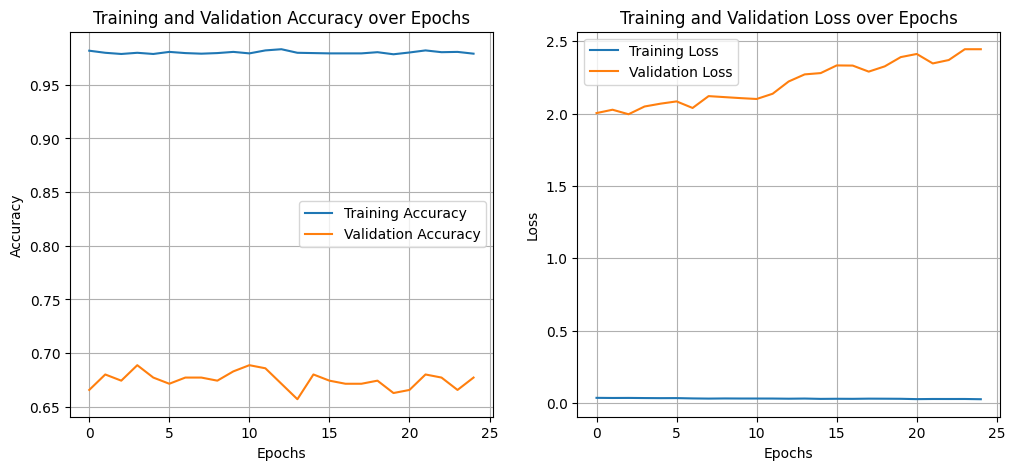

Accuracy Graph: Training accuracy remains consistently high at approximately 99%, while validation accuracy stays significantly lower at around 67-69%. This 30-percentage-point gap between training and validation performance is a clear indicator of overfitting.​
​
Loss Graph: Training loss stays near zero throughout the training process, indicating excellent performance on training data. However, validation loss starts at approximately 2.0 and gradually increases to about 2.4 over the epochs. This divergence—where training loss remains low while validation loss rises—is a sign of overfitting.​

In summary, the model has essentially memorized the training data rather than learning generalizable patterns. The increasing validation loss indicates that continued training actually worsens the model's ability to predict unseen data. This is not underfitting since training accuracy is extremely high; underfitting would show poor performance on both training and validation sets.



In [71]:
# Answer here
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')    
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')    
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

print("Accuracy Graph: Training accuracy remains consistently high at approximately 99%, while validation accuracy stays significantly lower at around 67-69%. This 30-percentage-point gap between training and validation performance is a clear indicator of overfitting.​\n​")
print("Loss Graph: Training loss stays near zero throughout the training process, indicating excellent performance on training data. However, validation loss starts at approximately 2.0 and gradually increases to about 2.4 over the epochs. This divergence—where training loss remains low while validation loss rises—is a sign of overfitting.​\n")
print("In summary, the model has essentially memorized the training data rather than learning generalizable patterns. The increasing validation loss indicates that continued training actually worsens the model's ability to predict unseen data. This is not underfitting since training accuracy is extremely high; underfitting would show poor performance on both training and validation sets.\n")

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [72]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2315,30311,Watch this amazing live.ly broadcast by @evanh...,"[Watch, this, amazing, live.ly, broadcast, by,..."
3503,40676,Do not be discouraged by a slowing sales marke...,"[Do, not, be, discouraged, by, a, slowing, sal..."
3355,40528,@VosachResrus ^'ll just #wobble carry you #sink,"[@, VosachResrus, ^, 'll, just, #, wobble, car..."
103,10103,Wont use using @mothercareuk @Mothercarehelp a...,"[Wont, use, using, @, mothercareuk, @, Motherc..."
32,10032,I blame the whole season on Natalie! The seaso...,"[I, blame, the, whole, season, on, Natalie, !,..."


In [73]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Watch', 'this', 'amazing', 'live.ly', 'broadcast', 'by', '@', 'evanhufferd', '#', 'lively', '#', 'musically']),
       list(['Do', 'not', 'be', 'discouraged', 'by', 'a', 'slowing', 'sales', 'market', '.', 'This', 'will', 'test', 'your', 'business', 'model', 'and', 'pinpoint', '#', 'strengths', 'and', '#', 'weaknesses', '.', "'", '@', 'Ken_Dunn']),
       list(['@', 'VosachResrus', '^', "'ll", 'just', '#', 'wobble', 'carry', 'you', '#', 'sink'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [74]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [88]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.22531427,  0.3643656 , -0.2912665 , -0.2985571 , -0.3428376 ,
       -0.773422  ,  0.2788657 ,  1.328548  , -0.2716127 , -0.33343884,
       -0.3974666 , -0.42839807, -0.22274642, -0.00369451,  0.11056962,
       -0.24962199,  0.4897342 , -0.6014742 ,  0.12218917, -1.2824204 ,
        1.0978057 ,  0.86462456,  0.5859312 , -0.31543154,  0.5777687 ,
        0.2891918 , -0.6482941 ,  0.40071616, -0.5170942 ,  0.5086191 ,
        0.28813103,  0.02840217,  0.5352924 , -0.39276958, -0.42691416,
        0.7632151 ,  0.03410374, -0.05185807, -0.47929722, -0.36650372,
       -0.17387432,  0.20738135, -0.4544342 , -0.1619823 ,  0.8023229 ,
       -0.43660998, -0.716653  ,  0.3085435 ,  0.53913444,  0.48547846,
       -0.00350274, -0.4671234 , -0.18954419,  0.00661621, -0.66332096,
       -0.51040965,  0.088158  , -0.12030328, -0.2103161 ,  0.28912887,
        0.19673942, -0.0951177 ,  0.5764611 ,  0.5155929 , -0.79153854,
        0.9483823 ,  0.43028864,  0.67642164, -1.4306719 ,  1.10

In [89]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9366186261177063),
 ("'be", 0.9190923571586609),
 ('Be', 0.9062787294387817),
 ('free', 0.8974747657775879),
 ('cats', 0.8941317796707153),
 ('bday', 0.8937610983848572),
 ('O', 0.8909387588500977),
 ('dad', 0.8908081650733948),
 ('smile', 0.8884727358818054),
 ('Happy', 0.8883360624313354)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [93]:
from gensim.models import KeyedVectors
google_news_vectors_path = "./GoogleNews"

## Note: this model is huge, this will take some time ...
model_path = f"{google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [79]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [94]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [95]:
# Answer here
print("""Once we have the word vector for each word, the next step is to combine multiple word vectors to form a sentence vector that can represent the entire sentence.
There are several common methods:
Average Pooling: Take the average of all word vectors in a sentence to serve as the sentence vector.
Sum Pooling: Add the word vectors together, allowing high-frequency or semantically strong words to influence the overall sentence vector.
Using Sequential Models (LSTM/GRU): If you want to preserve word order information, you can input the word vector sequence into LSTM or GRU models, allowing the model to automatically learn contextual dependencies.""")

Once we have the word vector for each word, the next step is to combine multiple word vectors to form a sentence vector that can represent the entire sentence.
There are several common methods:
Average Pooling: Take the average of all word vectors in a sentence to serve as the sentence vector.
Sum Pooling: Add the word vectors together, allowing high-frequency or semantically strong words to influence the overall sentence vector.
Using Sequential Models (LSTM/GRU): If you want to preserve word order information, you can input the word vector sequence into LSTM or GRU models, allowing the model to automatically learn contextual dependencies.


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [96]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [97]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [98]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [99]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [100]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

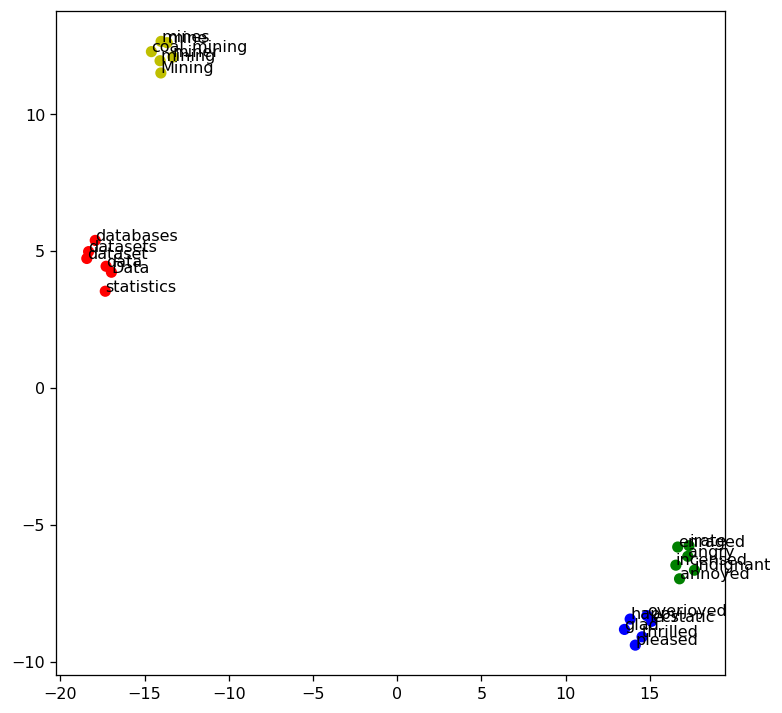

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

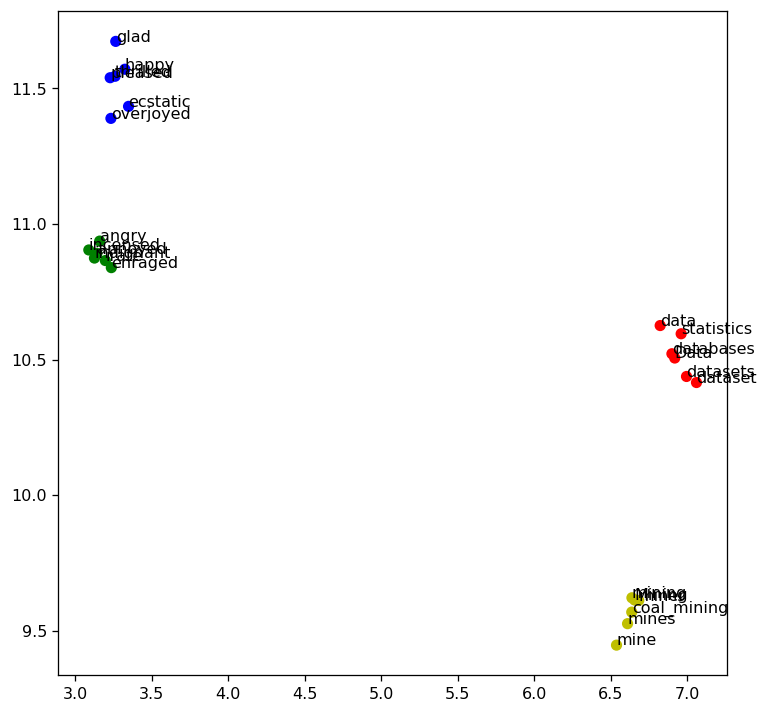

In [102]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.`

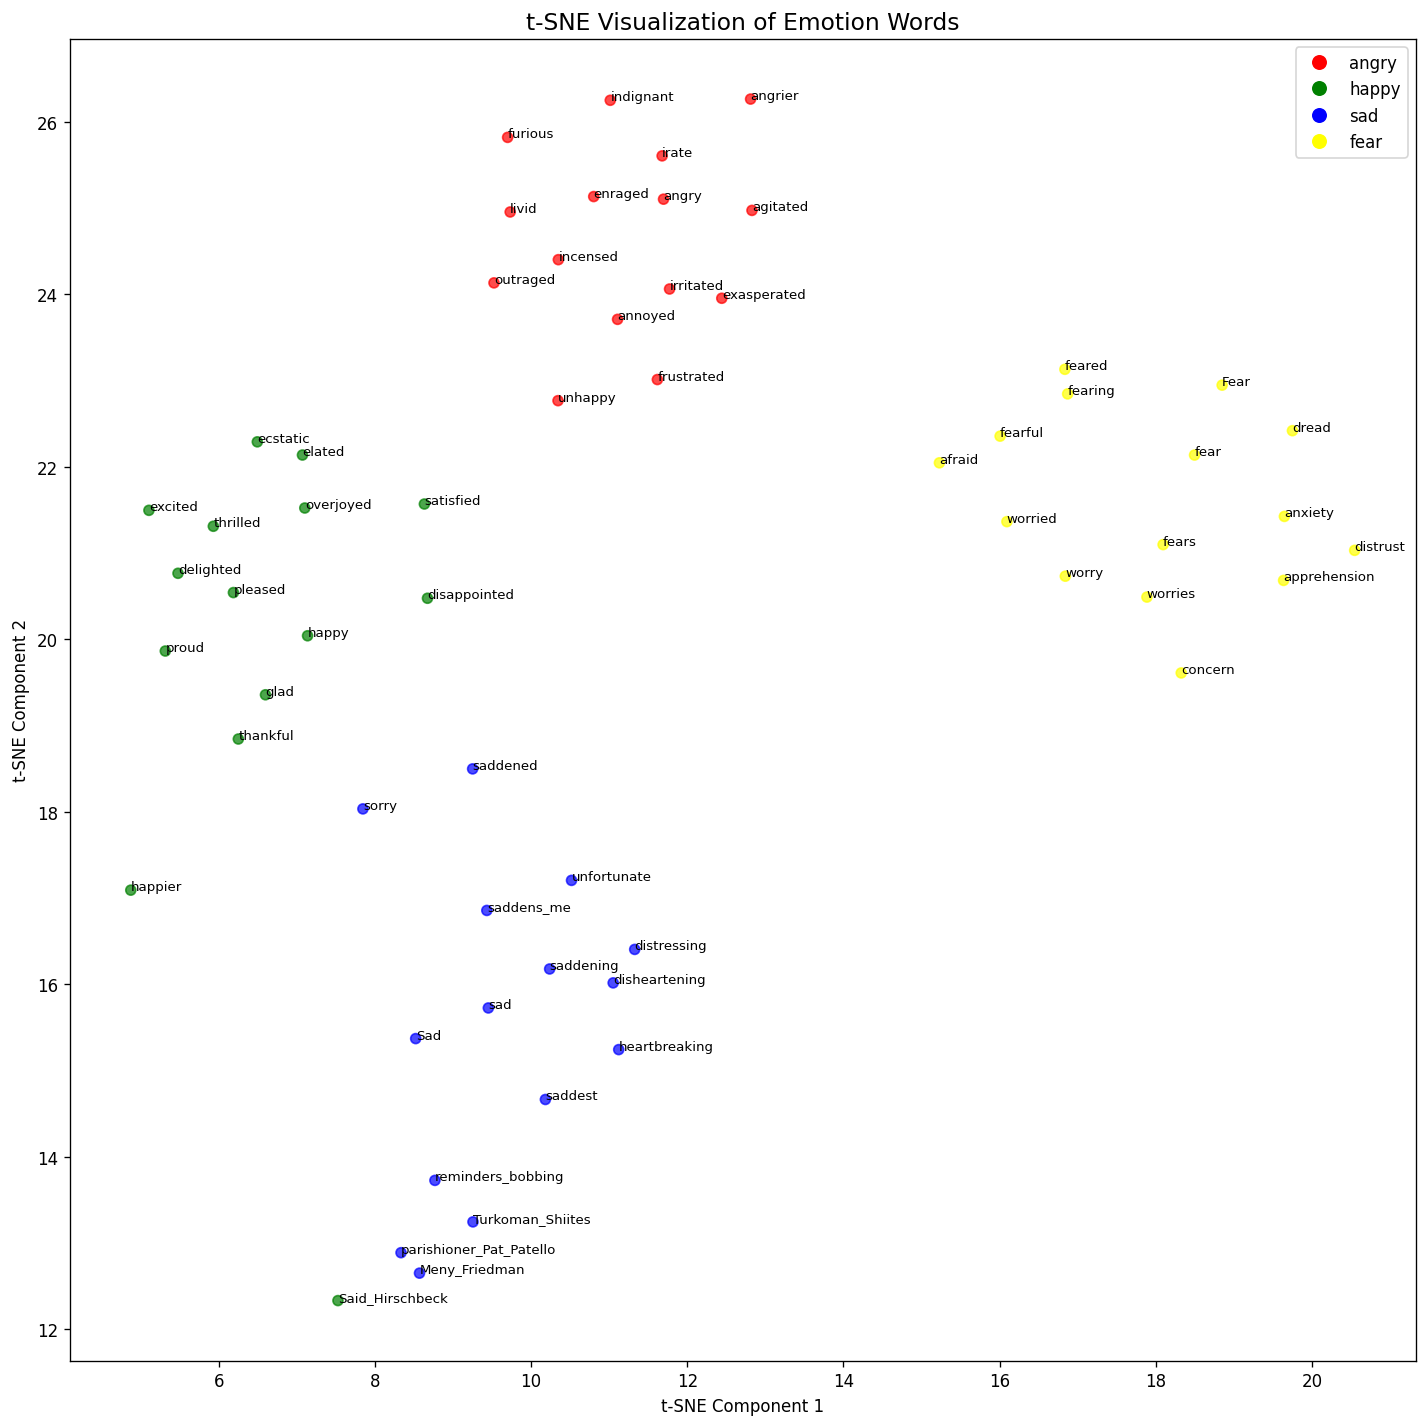

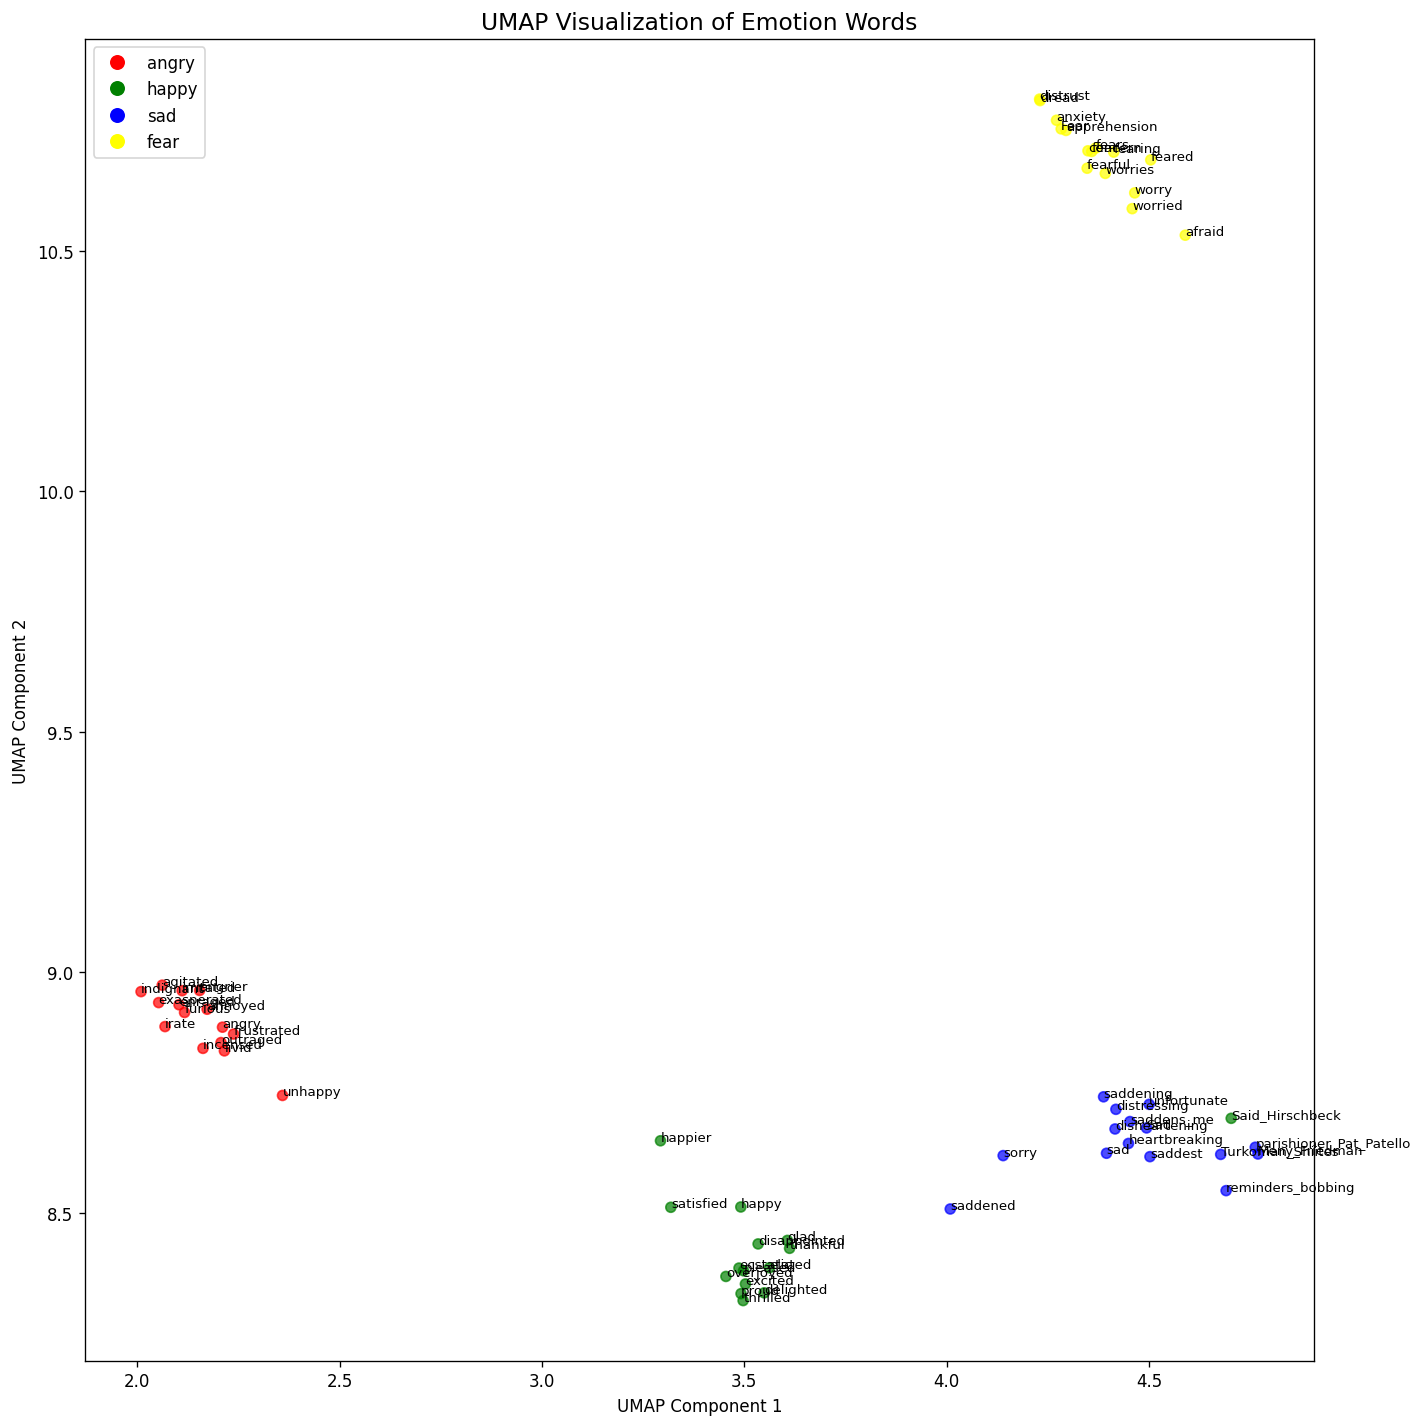

In [105]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np

model = w2v_google_model

topn = 15
seed_words = ['angry', 'happy', 'sad', 'fear']
colors = ['red', 'green', 'blue', 'yellow']
target_words = []
color_list = []

for i, word in enumerate(seed_words):
    similar_words = [w for w, _ in model.most_similar(word, topn=topn-1)]
    word_group = [word] + similar_words
    target_words.extend(word_group)
    color_list.extend([colors[i]] * topn)

target_size = len(target_words)
all_words = list(model.index_to_key)
context_words = [w for w in all_words[:500] if w not in target_words]
word_train = target_words + context_words
X_train = model[word_train]

# 3. t-SNE Visualization
tsne = TSNE(n_components=2, metric='cosine', random_state=42, perplexity=30, max_iter =1000)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 12), dpi=120)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color_list, alpha=0.7)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)
plt.title('t-SNE Visualization of Emotion Words', fontsize=14)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=w, markersize=10) 
                    for c, w in zip(colors, seed_words)])
plt.tight_layout()
plt.show()

# 4. UMAP Visualization
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_train)

plt.figure(figsize=(12, 12), dpi=120)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color_list, alpha=0.7)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)
plt.title('UMAP Visualization of Emotion Words', fontsize=14)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=w, markersize=10) 
                    for c, w in zip(colors, seed_words)])
plt.tight_layout()
plt.show()

---